In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D, LSTM, Embedding
from tensorflow.keras.models import Model

In [3]:
!wget -nc https://lazyprogrammer.me/course_files/spam.csv

--2023-11-04 05:41:01--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K  1.43MB/s    in 0.3s    

2023-11-04 05:41:02 (1.43 MB/s) - ‘spam.csv’ saved [503663/503663]



In [7]:
df = pd.read_csv('spam.csv', encoding = 'ISO_8859_1')

In [8]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis =1)

In [10]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
#rename columns
df.columns = ['labels', 'data']

In [12]:
df

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [13]:
#create binary labels
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})
Y = df['b_labels'].values

In [14]:
#split up the data
df_train, df_test, Ytrain, Ytest = train_test_split(df['data'], Y, test_size = 0.33)

In [16]:
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words = MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test = tokenizer.texts_to_sequences(df_test)

In [18]:
word2idx = tokenizer.word_index
V = len(word2idx)
print("Found %s unique tokens" %V)

Found 7270 unique tokens


In [19]:
data_train = pad_sequences(sequences_train)
print("Shape of data train tensor: ",data_train.shape)

T = data_train.shape[1]

Shape of data train tensor:  (3733, 189)


In [20]:
data_test = pad_sequences(sequences_test, maxlen = T)
print("Shape of data test tensor: ",data_test.shape)

Shape of data test tensor:  (1839, 189)


In [22]:
# create the model

# choose embedding dimensionality
D = 20

#Hidden state dimensionality
M = 15

# Note: we actually want the  size of embedding to(V + 1) x D,
# because the first index starts from 1 and not 0
# Thus, if the final index of the embedding matrix is V,
# Then it actually must have size V + 1
i = Input(shape = (T,))
x = Embedding(V + 1, D)(i)
x = LSTM(M, return_sequences = True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation = 'sigmoid')(x)

model = Model(i, x)

In [31]:
#Compile and fit
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

r = model.fit(
    data_train,
    Ytrain,
    epochs = 10,
    validation_data = (data_test, Ytest)
 )

Epoch 1/10
117/117 [==============================] - 14s 100ms/step - loss: 0.4782 - accuracy: 0.8363 - val_loss: 0.3479 - val_accuracy: 0.8695
Epoch 2/10
117/117 [==============================] - 11s 95ms/step - loss: 0.3245 - accuracy: 0.8642 - val_loss: 0.2994 - val_accuracy: 0.8695
Epoch 3/10
117/117 [==============================] - 11s 91ms/step - loss: 0.2767 - accuracy: 0.8642 - val_loss: 0.2581 - val_accuracy: 0.8695
Epoch 4/10
117/117 [==============================] - 18s 151ms/step - loss: 0.2326 - accuracy: 0.8642 - val_loss: 0.2174 - val_accuracy: 0.8695
Epoch 5/10
117/117 [==============================] - 21s 181ms/step - loss: 0.1846 - accuracy: 0.8942 - val_loss: 0.1713 - val_accuracy: 0.9750
Epoch 6/10
117/117 [==============================] - 19s 164ms/step - loss: 0.1381 - accuracy: 0.9914 - val_loss: 0.1287 - val_accuracy: 0.9837
Epoch 7/10
117/117 [==============================] - 14s 116ms/step - loss: 0.0955 - accuracy: 0.9952 - val_loss: 0.0998 - val_accu

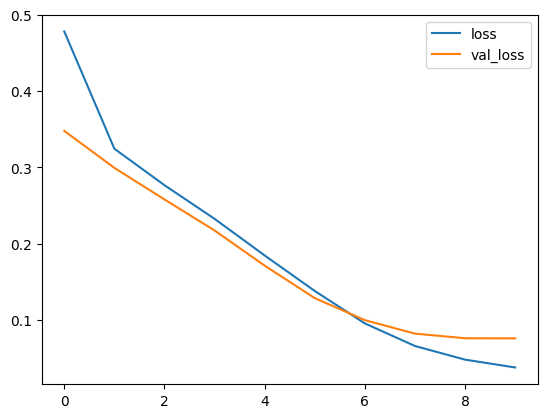

In [33]:
plt.plot(r.history['loss'], label ='loss')
plt.plot(r.history['val_loss'], label ='val_loss')
plt.legend()

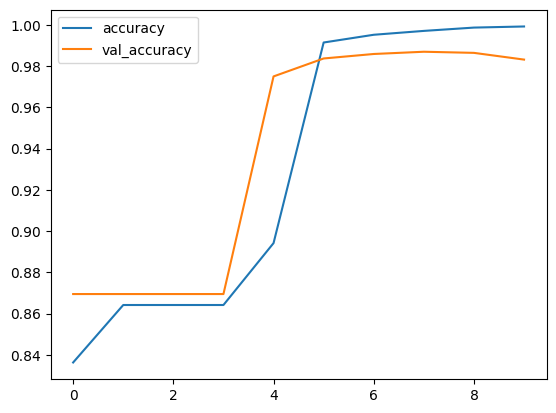

In [32]:
plt.plot(r.history['accuracy'], label ='accuracy')
plt.plot(r.history['val_accuracy'], label ='val_accuracy')
plt.legend()